In [190]:
import pandas as pd
import time
from matplotlib import pyplot as plt
import os
import geopandas as gpd
import sys
sys.path.append(r"..\python")
import coordTransform_utils
import datetime

In [191]:
bike_path = r"E:\Data\深圳共享单车"
bike_csv_list = [os.path.join(bike_path,bike) for bike in os.listdir(bike_path)]  # 将文件夹中的所有文件保存为完整的路径列表
bike_csv_list[1]

'E:\\Data\\深圳共享单车\\bike1000-2000.csv'

In [192]:
columns = ['START_TIME','END_TIME','START_LAT','START_LNG','END_LAT','END_LNG']
bike0 = pd.read_csv(bike_csv_list[0],usecols=columns)
bike0.describe(),bike0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999000 entries, 0 to 998999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   START_TIME  999000 non-null  object 
 1   END_TIME    999000 non-null  object 
 2   START_LAT   999000 non-null  float64
 3   START_LNG   999000 non-null  float64
 4   END_LAT     999000 non-null  float64
 5   END_LNG     999000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.7+ MB


(           START_LAT      START_LNG        END_LAT        END_LNG
 count  999000.000000  999000.000000  999000.000000  999000.000000
 mean       22.586728     113.974207      22.589242     113.997172
 std         0.445079       1.875573       0.164769       0.760201
 min         0.000000       0.000000       0.000000       0.000000
 25%        22.541569     113.923723      22.541540     113.922739
 50%        22.567178     114.030734      22.567344     114.030260
 75%        22.633355     114.069340      22.633734     114.069015
 max        47.660913     132.535877      39.908532     116.397775,
 None)

In [193]:
bike0.head()

,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG
0,2021-01-30 13:19:32,2021-01-30 13:23:18,22.636409,114.013309,22.632029,114.015535
1,2021-01-31 23:49:12,2021-01-31 23:54:37,22.585426,113.858985,22.581040,113.857780
2,2021-01-30 13:09:10,2021-01-30 13:23:24,22.647903,114.027888,22.637769,114.045766
3,2021-01-30 13:09:47,2021-01-30 13:20:45,22.518310,114.056118,22.520040,114.056252
4,2021-01-31 23:37:58,2021-01-31 23:59:47,22.544336,114.112874,22.545981,114.136066


In [194]:
bike0['START_TIME'] = pd.to_datetime(bike0['START_TIME'])
bike0['END_TIME'] = pd.to_datetime(bike0['END_TIME'])

In [195]:
bike0 = bike0[bike0['END_TIME']>bike0['START_TIME']] # 终止时间必然要晚于起始时间

bike0.reset_index(inplace=True,drop=True)
# bike0.drop(labels='index')
bike0.info()
bike0.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998992 entries, 0 to 998991
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   START_TIME  998992 non-null  datetime64[ns]
 1   END_TIME    998992 non-null  datetime64[ns]
 2   START_LAT   998992 non-null  float64       
 3   START_LNG   998992 non-null  float64       
 4   END_LAT     998992 non-null  float64       
 5   END_LNG     998992 non-null  float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 45.7 MB


,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG
998987,2021-01-31 18:22:41,2021-01-31 18:53:31,22.555566,114.070105,22.540941,114.100657
998988,2021-01-31 18:01:58,2021-01-31 18:53:38,22.485901,113.930720,22.493734,113.938758
998989,2021-02-01 16:10:31,2021-02-01 16:16:22,22.545161,114.076728,22.544314,114.087112
998990,2021-02-01 19:32:14,2021-02-01 19:43:35,22.603318,114.045247,22.603187,114.038576
998991,2021-02-01 19:32:14,2021-02-01 19:43:35,22.603371,114.045301,22.603240,114.038630


In [196]:
bike0['START_LAT'].loc[134372]

22.57533585

In [197]:
# 读取深圳市边界数据
sz_boundary = gpd.read_file(r"E:\Data\深圳\深圳市.json")
sz_boundary.head()

,adcode,name,childrenNum,level,parent,subFeatureIndex,geometry
0,440303,罗湖区,0,district,{'adcode': 440300},0,"MULTIPOLYGON (((114.10517 22.53163, 114.10791 ..."
1,440304,福田区,0,district,{'adcode': 440300},1,"MULTIPOLYGON (((114.06630 22.58567, 114.06212 ..."
2,440305,南山区,0,district,{'adcode': 440300},2,"MULTIPOLYGON (((114.02351 22.58165, 114.02394 ..."
3,440306,宝安区,0,district,{'adcode': 440300},3,"MULTIPOLYGON (((113.91096 22.82999, 113.91002 ..."
4,440307,龙岗区,0,district,{'adcode': 440300},4,"MULTIPOLYGON (((114.35578 22.76579, 114.35658 ..."


In [198]:
sz_boundary.bounds

,minx,miny,maxx,maxy
0,114.066304,22.526975,114.219967,22.616190
1,113.990547,22.499623,114.105173,22.587533
2,113.786280,22.396343,114.026417,22.652477
3,113.751453,22.526416,113.980092,22.861749
4,114.050228,22.438579,114.628466,22.813694
5,114.202882,22.540044,114.353519,22.653831
6,113.966630,22.580564,114.113365,22.771820
7,114.267001,22.622175,114.445344,22.781322
8,113.857809,22.686218,114.009201,22.832711


In [199]:
lat_min = sz_boundary.bounds['miny'].min()
lon_min = sz_boundary.bounds['minx'].min()
lat_max = sz_boundary.bounds['maxy'].max()
lon_max = sz_boundary.bounds['maxx'].max()
lat_min,lon_min,lat_max,lon_max  # 深圳市范围 WGS84坐标系

(22.396343, 113.751453, 22.861749, 114.628466)

In [200]:
def bike_bd2wgs84(df,lat_col,lon_col):
    lat_list = []
    lon_list = []
    for i in range(len(df)):
        lat = df[lat_col].loc[i]
        lon = df[lon_col].loc[i]
        lon_list.append(coordTransform_utils.bd09_to_wgs84(lon,lat)[0]) 
        lat_list.append(coordTransform_utils.bd09_to_wgs84(lon,lat)[1])
    return  lon_list,lat_list

In [201]:
# 数据类型转为浮点型
bike0['START_LAT'] = bike0['START_LAT'].astype('Float32')
bike0['START_LNG'] = bike0['START_LNG'].astype('Float32')
bike0['END_LAT'] = bike0['END_LAT'].astype('Float32')
bike0['END_LNG'] = bike0['END_LNG'].astype('Float32')

In [202]:
bike0.head()

,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG
0,2021-01-30 13:19:32,2021-01-30 13:23:18,22.63641,114.013306,22.632029,114.015533
1,2021-01-31 23:49:12,2021-01-31 23:54:37,22.585426,113.858986,22.581039,113.85778
2,2021-01-30 13:09:10,2021-01-30 13:23:24,22.647903,114.027885,22.637768,114.045769
3,2021-01-30 13:09:47,2021-01-30 13:20:45,22.518311,114.056114,22.520041,114.056252
4,2021-01-31 23:37:58,2021-01-31 23:59:47,22.544336,114.112877,22.54598,114.136063


In [203]:
lon,lat = bike_bd2wgs84(bike0,lat_col='START_LAT',lon_col='START_LNG')

In [204]:
bike0['START_LAT'] = lat
bike0['START_LNG'] = lon

In [205]:
lon,lat = bike_bd2wgs84(bike0,lat_col='END_LAT',lon_col='END_LNG')
bike0['END_LAT'] = lat
bike0['END_LNG'] = lon

In [206]:
bike0.head()

,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG
0,2021-01-30 13:19:32,2021-01-30 13:23:18,22.632927,114.001862,22.628555,114.004077
1,2021-01-31 23:49:12,2021-01-31 23:54:37,22.582382,113.847527,22.578016,113.846317
2,2021-01-30 13:09:10,2021-01-30 13:23:24,22.644549,114.016379,22.634675,114.034157
3,2021-01-30 13:09:47,2021-01-30 13:20:45,22.515340,114.044467,22.517071,114.044605
4,2021-01-31 23:37:58,2021-01-31 23:59:47,22.540764,114.101330,22.542385,114.124560


In [207]:
bike0 = bike0[(bike0['START_LAT'] < lat_max) & (bike0['START_LAT'] > lat_min) & 
              (bike0['START_LNG'] < lon_max) & (bike0['START_LNG'] > lon_min) &
              (bike0['END_LAT'] < lat_max) & (bike0['END_LAT'] > lat_min) &
              (bike0['END_LNG'] < lon_max) & (bike0['END_LNG'] > lon_min)]

In [208]:
bike0.head(),bike0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998300 entries, 0 to 998991
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   START_TIME  998300 non-null  datetime64[ns]
 1   END_TIME    998300 non-null  datetime64[ns]
 2   START_LAT   998300 non-null  float64       
 3   START_LNG   998300 non-null  float64       
 4   END_LAT     998300 non-null  float64       
 5   END_LNG     998300 non-null  float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 53.3 MB


(           START_TIME            END_TIME  START_LAT   START_LNG    END_LAT  \
 0 2021-01-30 13:19:32 2021-01-30 13:23:18  22.632927  114.001862  22.628555   
 1 2021-01-31 23:49:12 2021-01-31 23:54:37  22.582382  113.847527  22.578016   
 2 2021-01-30 13:09:10 2021-01-30 13:23:24  22.644549  114.016379  22.634675   
 3 2021-01-30 13:09:47 2021-01-30 13:20:45  22.515340  114.044467  22.517071   
 4 2021-01-31 23:37:58 2021-01-31 23:59:47  22.540764  114.101330  22.542385   
 
       END_LNG  
 0  114.004077  
 1  113.846317  
 2  114.034157  
 3  114.044605  
 4  114.124560  ,
 None)

In [209]:
bike0.reset_index(drop=True,inplace=True)

In [210]:
bike0['START_DAY'] = bike0['START_TIME'].dt.date
bike0['END_DAY'] = bike0['END_TIME'].dt.date
bike0.head()

,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG,START_DAY,END_DAY
0,2021-01-30 13:19:32,2021-01-30 13:23:18,22.632927,114.001862,22.628555,114.004077,2021-01-30,2021-01-30
1,2021-01-31 23:49:12,2021-01-31 23:54:37,22.582382,113.847527,22.578016,113.846317,2021-01-31,2021-01-31
2,2021-01-30 13:09:10,2021-01-30 13:23:24,22.644549,114.016379,22.634675,114.034157,2021-01-30,2021-01-30
3,2021-01-30 13:09:47,2021-01-30 13:20:45,22.515340,114.044467,22.517071,114.044605,2021-01-30,2021-01-30
4,2021-01-31 23:37:58,2021-01-31 23:59:47,22.540764,114.101330,22.542385,114.124560,2021-01-31,2021-01-31


In [211]:
bike0['during'] = bike0['END_TIME']-bike0['START_TIME']
bike0.head()

,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG,START_DAY,END_DAY,during
0,2021-01-30 13:19:32,2021-01-30 13:23:18,22.632927,114.001862,22.628555,114.004077,2021-01-30,2021-01-30,0 days 00:03:46
1,2021-01-31 23:49:12,2021-01-31 23:54:37,22.582382,113.847527,22.578016,113.846317,2021-01-31,2021-01-31,0 days 00:05:25
2,2021-01-30 13:09:10,2021-01-30 13:23:24,22.644549,114.016379,22.634675,114.034157,2021-01-30,2021-01-30,0 days 00:14:14
3,2021-01-30 13:09:47,2021-01-30 13:20:45,22.515340,114.044467,22.517071,114.044605,2021-01-30,2021-01-30,0 days 00:10:58
4,2021-01-31 23:37:58,2021-01-31 23:59:47,22.540764,114.101330,22.542385,114.124560,2021-01-31,2021-01-31,0 days 00:21:49


In [212]:
bike0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998300 entries, 0 to 998299
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   START_TIME  998300 non-null  datetime64[ns] 
 1   END_TIME    998300 non-null  datetime64[ns] 
 2   START_LAT   998300 non-null  float64        
 3   START_LNG   998300 non-null  float64        
 4   END_LAT     998300 non-null  float64        
 5   END_LNG     998300 non-null  float64        
 6   START_DAY   998300 non-null  object         
 7   END_DAY     998300 non-null  object         
 8   during      998300 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(2), timedelta64[ns](1)
memory usage: 68.5+ MB


In [213]:
bike0['during'] =  bike0['during'].dt.total_seconds()

In [214]:
bike0['during'].max()

21402.0

In [215]:
num = int(0.999*len(bike0))
bike0['during'].sort_values(ascending=True).iloc[:num].tail(20)

182184    8777.0
813011    8778.0
76261     8779.0
127750    8783.0
714896    8785.0
764742    8787.0
763924    8789.0
660384    8789.0
210957    8793.0
791133    8795.0
623590    8804.0
634103    8806.0
533031    8810.0
938423    8813.0
938419    8813.0
814099    8819.0
878822    8820.0
595719    8821.0
613017    8824.0
781315    8828.0
Name: during, dtype: float64

In [216]:
bike0['during'].sort_values(ascending=True).iloc[num:].tail(20)

638396    14400.0
139791    14400.0
44983     14400.0
783620    14400.0
646116    14400.0
25431     14400.0
613608    14400.0
572330    14400.0
622065    14400.0
92314     14400.0
111272    14400.0
522966    14400.0
636482    14400.0
668728    14400.0
33840     14400.0
796403    14410.0
740095    14410.0
963190    14464.0
549096    15454.0
426870    21402.0
Name: during, dtype: float64

In [217]:
bike0['during'].max()

21402.0

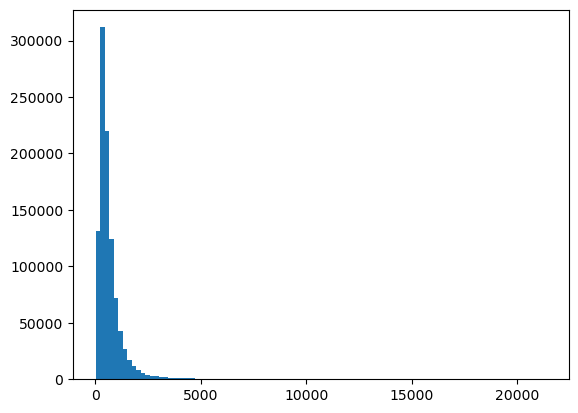

In [218]:
plt.hist(bike0['during'], bins = 100)  # pd.Series.dt属性 histogam直方图
plt.show()

In [219]:
bike0 = bike0[bike0['during']<9000]

In [220]:
bike0 = bike0[bike0['START_TIME']>=datetime.datetime(year=2021,month=1,day=30)]

In [221]:
bike0.describe()

,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG,during
count,993653,993653,993653.000000,993653.000000,993653.000000,993653.000000,993653.000000
mean,2021-02-01 00:12:24.415151360,2021-02-01 00:23:26.863159296,22.586780,113.991960,22.587127,113.990852,662.448009
min,2021-01-30 00:31:54,2021-01-30 00:50:30,22.419355,113.752173,22.422883,113.757401,1.000000
25%,2021-01-31 13:53:01,2021-01-31 14:04:22,22.538336,113.912332,22.538296,113.911337,296.000000
50%,2021-02-01 07:58:59,2021-02-01 08:08:18,22.563975,114.019187,22.564103,114.018763,474.000000
75%,2021-02-01 12:59:46,2021-02-01 13:10:30,22.630253,114.057591,22.630617,114.057327,775.000000
max,2021-02-01 19:43:27,2021-02-01 19:44:02,22.833852,114.466670,22.834831,114.466892,8998.000000
std,NaN,NaN,0.066907,0.100799,0.067394,0.101450,700.539822


In [222]:
bike0['START_TIME'].sort_values().iloc[:50]

29424    2021-01-30 00:31:54
5375     2021-01-30 00:46:35
435154   2021-01-30 04:00:59
163214   2021-01-30 05:04:31
613224   2021-01-30 05:30:39
33890    2021-01-30 06:53:45
84643    2021-01-30 06:58:59
41985    2021-01-30 07:06:11
16375    2021-01-30 07:09:28
378084   2021-01-30 07:15:47
342875   2021-01-30 07:20:22
342871   2021-01-30 07:20:22
465082   2021-01-30 07:21:13
35700    2021-01-30 07:27:22
184890   2021-01-30 07:27:28
3704     2021-01-30 07:27:51
235347   2021-01-30 07:29:44
470276   2021-01-30 07:34:02
228640   2021-01-30 07:34:02
72170    2021-01-30 07:34:21
478990   2021-01-30 07:34:32
120323   2021-01-30 07:35:31
191972   2021-01-30 07:35:31
142794   2021-01-30 07:37:54
182779   2021-01-30 07:38:39
104194   2021-01-30 07:40:48
16858    2021-01-30 07:41:07
22937    2021-01-30 07:48:09
128028   2021-01-30 07:48:42
329024   2021-01-30 07:50:17
376394   2021-01-30 07:50:24
376401   2021-01-30 07:50:24
126427   2021-01-30 07:51:18
104517   2021-01-30 07:57:49
15104    2021-

In [223]:
bike0[bike0['START_TIME']<datetime.datetime(year=2021,month=1,day=31)].__len__()

187363

In [224]:
bike0['START_DAY'] = bike0['START_TIME'].dt.date
bike0['END_DAY'] = bike0['END_TIME'].dt.date
bike0.head()

,START_TIME,END_TIME,START_LAT,START_LNG,END_LAT,END_LNG,START_DAY,END_DAY,during
0,2021-01-30 13:19:32,2021-01-30 13:23:18,22.632927,114.001862,22.628555,114.004077,2021-01-30,2021-01-30,226.0
1,2021-01-31 23:49:12,2021-01-31 23:54:37,22.582382,113.847527,22.578016,113.846317,2021-01-31,2021-01-31,325.0
2,2021-01-30 13:09:10,2021-01-30 13:23:24,22.644549,114.016379,22.634675,114.034157,2021-01-30,2021-01-30,854.0
3,2021-01-30 13:09:47,2021-01-30 13:20:45,22.515340,114.044467,22.517071,114.044605,2021-01-30,2021-01-30,658.0
4,2021-01-31 23:37:58,2021-01-31 23:59:47,22.540764,114.101330,22.542385,114.124560,2021-01-31,2021-01-31,1309.0


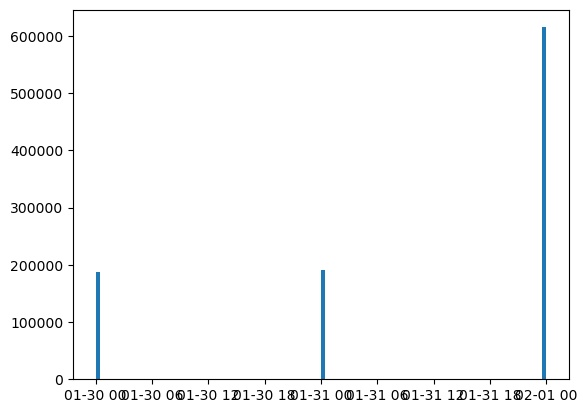

In [225]:
plt.hist(bike0['START_DAY'], bins = 100)  # pd.Series.dt属性 histogam直方图
plt.show()

In [226]:
bike0['START_hour'] = bike0['START_TIME'].dt.hour.astype('int')
# bike0['END_TIME'] = bike0['END_TIME'].dt.hour.astype('int')

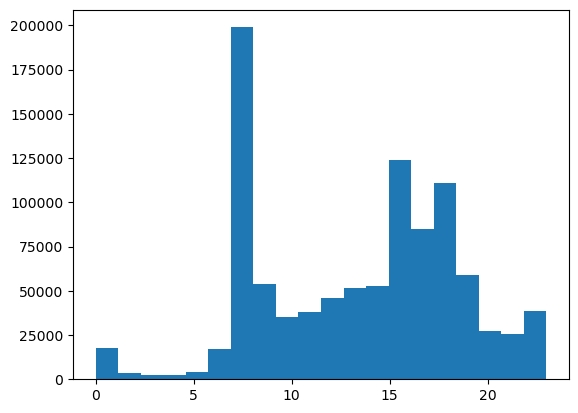

In [229]:
plt.hist(bike0['START_hour'], bins = 20)  # pd.Series.dt属性 histogam直方图
plt.show()